In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
df = pd.read_csv("Alphabets_data.csv")
x= df.drop("letter", axis=1).values
y = df["letter"].values

In [4]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded= le.fit_transform(y)
y_cat = to_categorical(y_encoded)

print(df.head())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_cat, test_size=0.2, random_state=42)

In [11]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax'))

c:\Users\Tejaswi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,938 (27.10 KB)

 Trainable params: 6,938 (27.10 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20, batch_size= 32)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3814 - loss: 2.2748 - val_accuracy: 0.7448 - val_loss: 0.8950
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7649 - loss: 0.8267 - val_accuracy: 0.8173 - val_loss: 0.6533
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.6160 - val_accuracy: 0.8382 - val_loss: 0.5362
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.4968 - val_accuracy: 0.8545 - val_loss: 0.4718
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.4139 - val_accuracy: 0.8745 - val_loss: 0.4139
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.3847 - val_accuracy: 0.8840 - val_loss: 0.3775
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.3323 - val_accuracy: 0.9043 - val_loss: 0.3337
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9100 - loss: 0.3059 - val_accuracy: 0.

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1809
Test Accuracy: 94.050002%


In [ ]:
preds = model.predict(x_test)
print(preds[:5])

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[2.2430891e-06 2.8406157e-08 5.1516191e-10 3.3086844e-04 2.4229024e-02
  3.9996730e-06 8.7620584e-11 3.2027454e-08 1.2372716e-05 4.2184280e-07
  2.1587867e-07 6.5369757e-05 9.8461962e-17 9.0558130e-15 6.6875859e-11
  2.0223294e-11 1.6441470e-09 9.5581931e-10 6.7465618e-04 1.8311474e-01
  1.2057928e-11 8.9675787e-09 2.5867956e-15 2.0601483e-01 2.7509125e-06
  5.8554846e-01]
 [1.0268321e-04 4.3091996e-04 2.1183903e-03 1.8426274e-06 8.5948251e-02
  6.7006389e-05 1.4740721e-06 4.4674778e-04 1.0549614e-05 3.5262553e-06
  5.2131303e-03 7.2771591e-01 9.4987863e-06 4.9803255e-04 7.8855276e-11
  8.9879883e-08 1.3559877e-13 9.5655806e-02 1.4584321e-06 8.1513055e-02
  9.1236160e-07 2.5457519e-04 7.9475871e-07 3.1616589e-06 2.3634248e-06
  5.7086065e-09]
 [1.0000000e+00 4.8237173e-20 5.3363023e-17 1.5031508e-13 2.7690438e-21
  2.5014095e-16 1.6581344e-12 3.9988048e-12 7.5152655e-13 9.1922753e-10
  8.3046024e-15 8.8003996e-15 5.6231990e-14 1.1797008e-14 2

In [ ]:
y_pred_classes= np.argmax(preds, axis=1)
print(y_pred_classes[:5])

[25 11  0  4 16]


In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred= np.argmax(preds, axis=1)

print("True:", y_true[:5])
print("preds", y_pred[:5])

True: [19 11  0  4 16]
preds [25 11  0  4 16]


In [ ]:
from sklearn.metrics import confusion_matrix as cm, classification_report
cm = cm(y_true, y_pred)

print(cm)
print(classification_report(y_true, y_pred))

[[147   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   0 127   0   2   0   2   1   0   0   1   0   0   0   3   0   0   0
    0   0   0   1   0   0   0   0]
 [  2   3   0 139   0   0   0   4   2   0   1   0   0   0   2   1   0   0
    0   1   0   0   0   0   0   1]
 [  0   1   0   0 133   0   1   0   1   0   2   0   0   0   0   0   1   0
    0   0   0   0   0   1   0   1]
 [  0   0   0   0   0 131   1   0   3   0   0   0   0   0   0   4   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   3   2   1   0 147   1   0   0   0   0   0   0   0   0   0   2
    0   0   0   4   0   0   0   0]
 [  0   6   0   1   0   0   1 119   0   0   4   0   0   2   2   0   0   7
    0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0 144   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0   0  

In [ ]:
print(cm)
print(type(cm))

[[147   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   0 127   0   2   0   2   1   0   0   1   0   0   0   3   0   0   0
    0   0   0   1   0   0   0   0]
 [  2   3   0 139   0   0   0   4   2   0   1   0   0   0   2   1   0   0
    0   1   0   0   0   0   0   1]
 [  0   1   0   0 133   0   1   0   1   0   2   0   0   0   0   0   1   0
    0   0   0   0   0   1   0   1]
 [  0   0   0   0   0 131   1   0   3   0   0   0   0   0   0   4   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   3   2   1   0 147   1   0   0   0   0   0   0   0   0   0   2
    0   0   0   4   0   0   0   0]
 [  0   6   0   1   0   0   1 119   0   0   4   0   0   2   2   0   0   7
    0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0 144   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0   0  

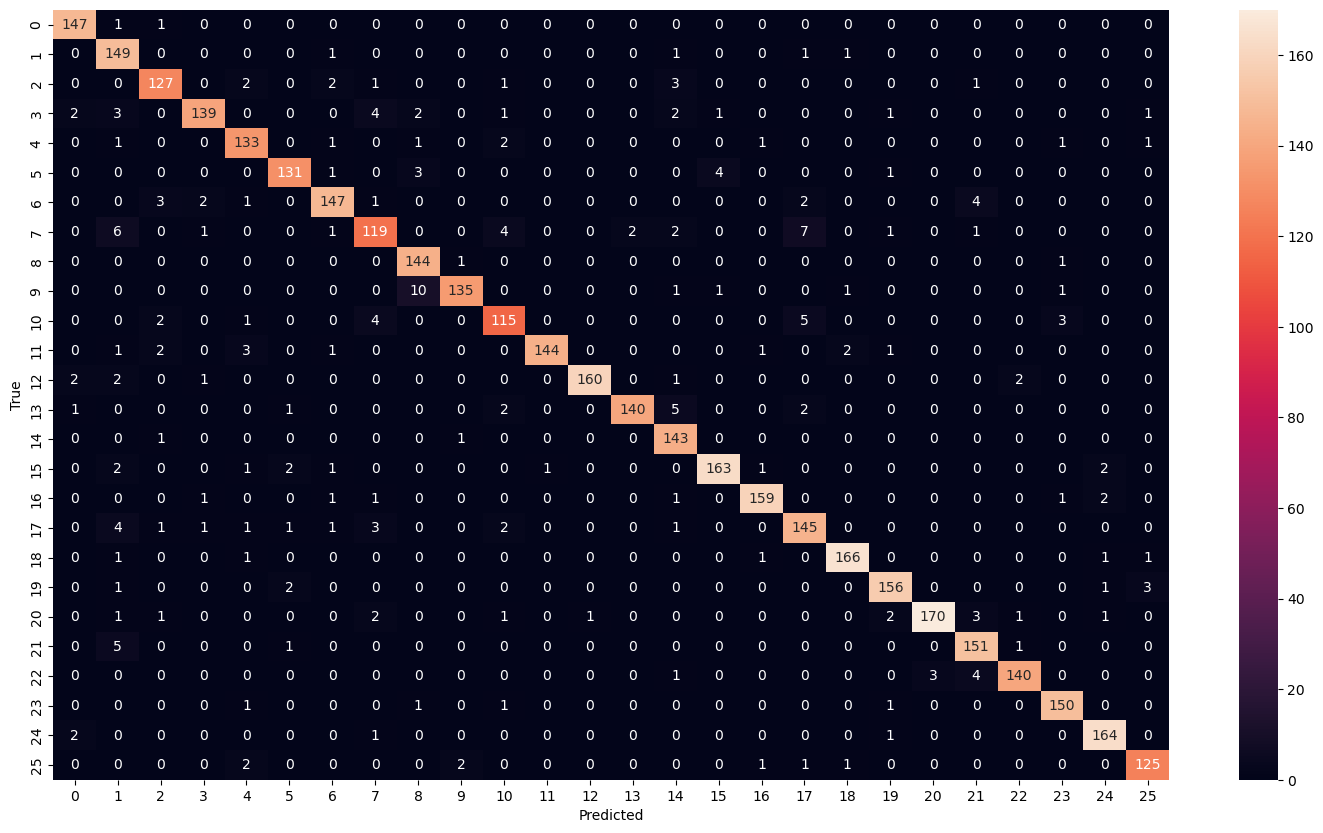

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(cm, fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

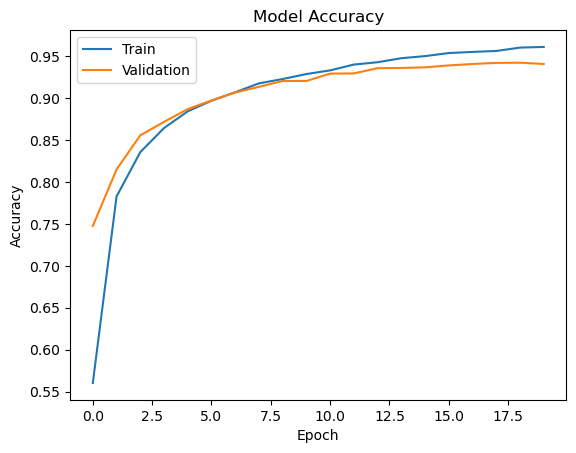

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Save the model 
import pickle
with open("model.pkl", 'wb') as p:
    pickle.dump(model.pkl)

#EXAMPLE

In [ ]:
df1 = [[1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7]]

In [ ]:
df2 = np.array(df1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

import joblib
joblib.dump(scaler, 'myscaler.save')



['myscaler.save']

In [ ]:
scaler = joblib.load('myscaler.save')  # load exact same scaler
df2_scaled = scaler.transform(df2)


In [ ]:
y_pred=model.predict(df2_scaled)
print("proabilities:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
proabilities: [[6.9585352e-37 1.2262426e-35 9.9329007e-01 0.0000000e+00 3.9570083e-12
  9.4900466e-17 7.3045121e-06 1.6237056e-23 5.2281002e-10 6.1747625e-09
  6.9006873e-32 3.1424174e-09 0.0000000e+00 0.0000000e+00 9.0263166e-26
  1.3619118e-27 2.2171414e-05 0.0000000e+00 6.6803708e-03 5.0692772e-26
  0.0000000e+00 1.5945331e-28 0.0000000e+00 3.4775859e-38 2.3581997e-24
  8.6235928e-18]]


In [ ]:
class_index = np.argmax(y_pred, axis=1)
print("class index:", class_index)

class index: [2]


In [ ]:
predicted_letter = le.inverse_transform([class_index[0]])
print("Predicted:", predicted_letter[0])


Predicted: C
